In [1]:
from ishockpy import *
import numpy as np
%load_ext snakeviz

In [2]:
from numpy import linspace, sqrt, array, cos, pi, arange, piecewise
c=2.99E10





TOTAL_ENERGY = 2*1.E51/(4* pi)



dT = .005
t0 = 0.
Rmin = 1.2E4
#iTime = linspace(T0+dT,0.,NUM_SHELLS)
tw=10.

NUM_SHELLS = int(tw/dT)

dE = float(TOTAL_ENERGY)/float(NUM_SHELLS)
def GammaDist2(t):
    
    if t<=0.4*tw:
        val = 250.-150.* cos(pi*t/(.4*tw))
    else:
        val =400.

    return val

def GammaDist(i):
    
    if i>=100:
        gamma = 400.

    else:
        gamma = 100.

    return gamma


iGamma=[]

for t in arange(t0,tw,dT):

    iGamma.append(GammaDist2(t))


def RadialDist(i):
    
    v=c*sqrt((iGamma[i]**2)-1.)/iGamma[i]
    
    return -iTime[i]*v


def RadialDist2(i):
    
    v=c*sqrt((iGamma[i]**2)-1.)/iGamma[i]
    
    return Rmin+arange(t0,tw,dT)[i]*v



    

iRad = []

for i in range(NUM_SHELLS-1,-1,-1):

   
    iRad.append(RadialDist2(i))



    
    
   
    

iGamma = array(iGamma)

iMass = dE/(iGamma*(c**2))



In [3]:

%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


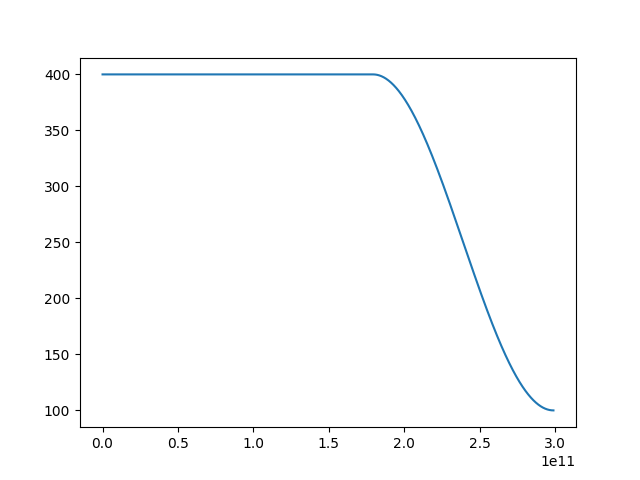

In [4]:
fig, ax = plt.subplots()

ax.plot(iRad,iGamma)

<IPython.core.display.Javascript object>


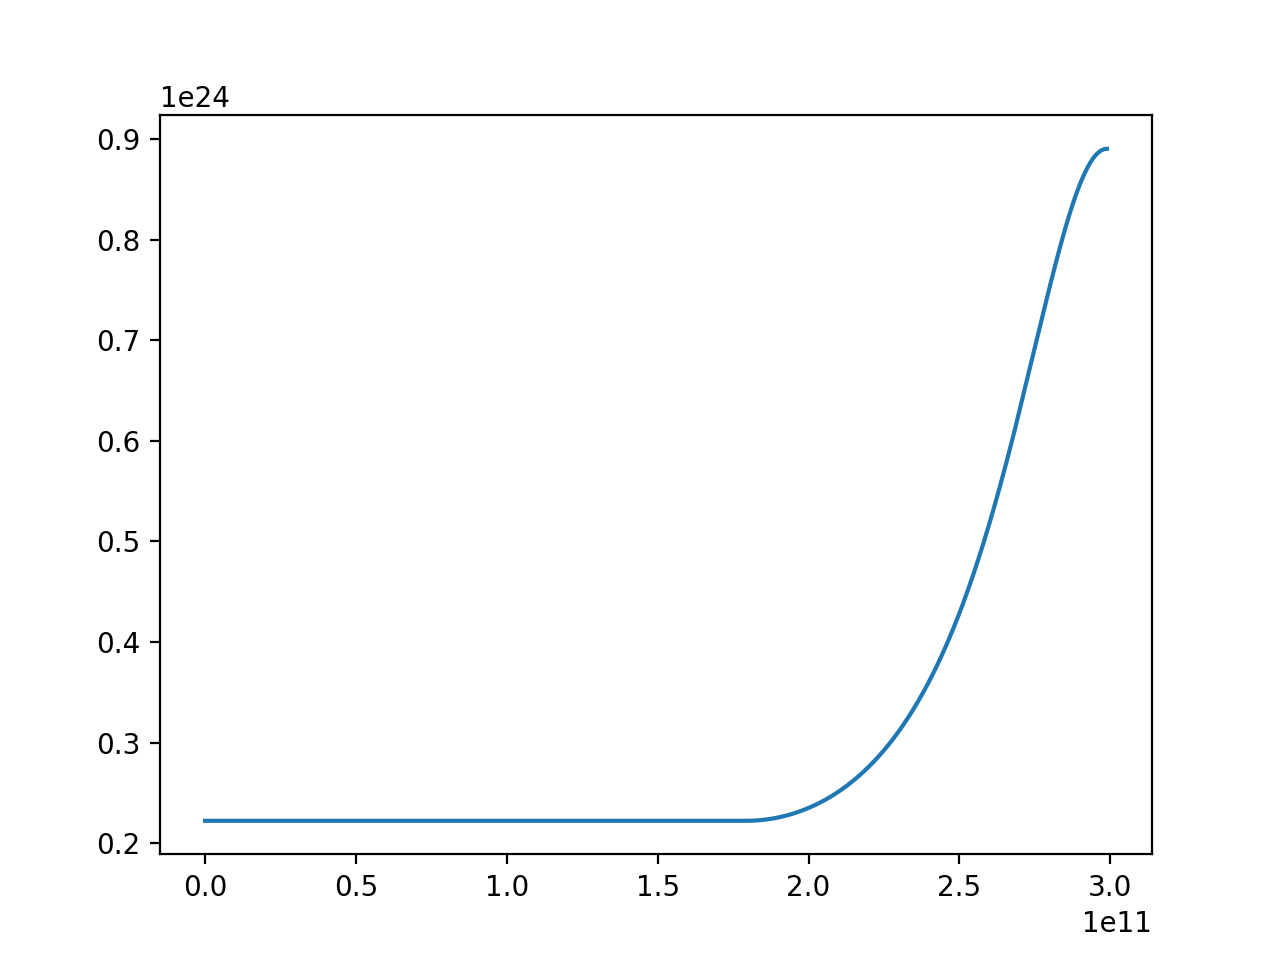

In [5]:
fig, ax = plt.subplots()

ax.plot(iRad,iMass)

In [5]:
jet = Jet(Rmin,dT,iMass,iGamma,store=True)

In [6]:
%snakeviz jet.start()

 
*** Profile stats marshalled to file '/var/folders/_0/x_8bb4nj2g1fwkn77r2wv5_40000gn/T/tmplyjsseti'. 
Embedding SnakeViz in the notebook...


<IPython.core.display.Javascript object>


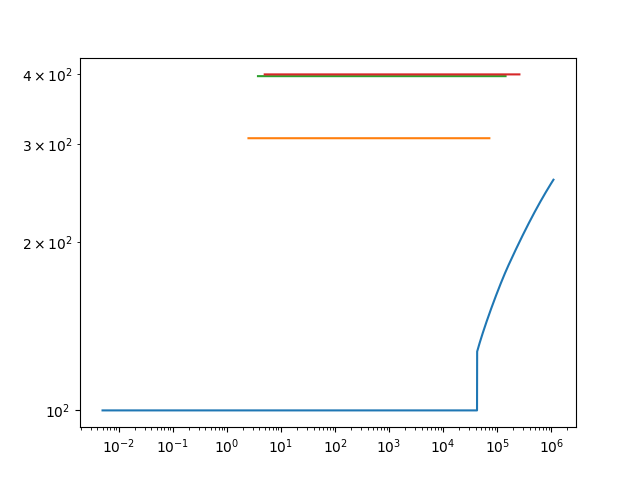

In [8]:
fig, ax = plt.subplots()

stat = jet._shells[0]._history.status


ax.loglog(jet._shells[0]._history.time[stat],np.array(jet._shells[0]._history._gamma)[stat] )

id = 20
stat = jet._shells[id]._history.status

id = 500
stat = jet._shells[id]._history.status


ax.loglog(jet._shells[id]._history.time[stat],np.array(jet._shells[id]._history._gamma)[stat] )

id = 750
stat = jet._shells[id]._history.status


ax.loglog(jet._shells[id]._history.time[stat],np.array(jet._shells[id]._history._gamma)[stat] )




id = 1000
stat = jet._shells[id]._history.status


ax.loglog(jet._shells[id]._history.time[stat],np.array(jet._shells[id]._history._gamma)[stat] )



In [9]:
jet._shells.n_active_shells

1

In [11]:
jet._advance_time()
jet.n_collisions

1999

In [36]:
jet._shells.gamma_distribution

array([259.02443388])

In [10]:
jet._collisions['radiated_energy']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
1969   NaN
1970   NaN
1971   NaN
1972   NaN
1973   NaN
1974   NaN
1975   NaN
1976   NaN
1977   NaN
1978   NaN
1979   NaN
1980   NaN
1981   NaN
1982   NaN
1983   NaN
1984   NaN
1985   NaN
1986   NaN
1987   NaN
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
Name: radiated_energy, Length: 1999, dtype: float64

<IPython.core.display.Javascript object>


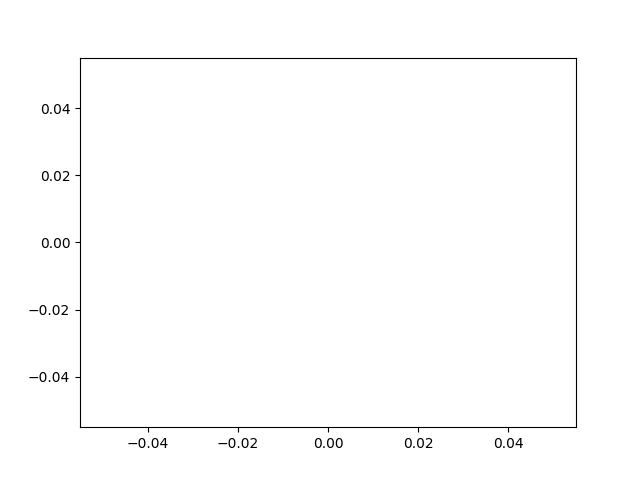

In [9]:
fig, ax = plt.subplots()


    
ax.plot(jet._collisions['time'],jet._collisions['radiated_energy'])
    



In [13]:
jet._shells.time_to_collisions.argmin()

127

In [8]:
jet._shells.velocity_ordered_shells[127]

radius: 877740755883580.250000
gamma: 118.412364
mass: 1503420247446565316198400.000000

In [17]:
jet._shells.velocity_ordered_shells[128]

radius: 877740755883580.250000
gamma: 118.553998
mass: 750812604849439601852416.000000

In [9]:
jet._shells.velocity_ordered_shells

array([ radius: 298997049.626231
gamma: 100.000000
mass: 890118360487552482279424.000000,
       radius: 149504524.986032
gamma: 100.001157
mass: 890108065561937333714944.000000], dtype=object)

In [8]:
jet._shells.activate_shells(0.,0)

In [11]:
jet._shells.velocity_ordered_shells

array([], dtype=object)

In [12]:
import pandas as pd

In [17]:
df = pd.DataFrame(columns=['radius','time','gamma'])

In [18]:
df

,radius,time,gamma


In [21]:
df.loc[0]=[1,2,3]

In [22]:
df

,radius,time,gamma
0,1.0,2.0,3.0
